### only change : use torch.nn.functional.cross_entropy(YY_hat, Y_true) - library function for loss function

In [1]:
import torch

import numpy as np
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(0) #torch seed for random

#### data(blob)

In [3]:
# data

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)

XX_train, XX_val, Y_train, Y_val = train_test_split(data, labels, 
                                                  stratify=labels, random_state=0)
print(XX_train.shape, XX_val.shape, labels.shape)

(750, 2) (250, 2) (1000,)


#### data as torch tensors

In [4]:
XX_train, Y_train, XX_val, Y_val = map(torch.tensor, (XX_train, Y_train, XX_val, Y_val)) 

# map the function to all and return all. - instead of calling on each one by one.

print(XX_train.shape, Y_train.shape)

torch.Size([750, 2]) torch.Size([750])


In [5]:
XX_train = XX_train.float()
Y_train = Y_train.long()  # as its an index.

##### Forward pass

In [6]:
# forward prop given input. return ouput.

# XX - a single datapoint(tensor) 
# or all datapoints(tensor)-that case returned o/p will be a set of outputs for each.(tensor)


def model(XX):
    AA1 = torch.matmul(XX, Wmat1) + Bvec1  # (N, 2) x (2, 2) -> (N, 2)
    # sigmoid
    HH1 = AA1.sigmoid()  # (N, 2)
    
    AA2 = torch.matmul(HH1, Wmat2) + Bvec2  # (N, 2) x (2, 4) -> (N, 4)

    # softmax
    HH2 = AA2.exp() / AA2.exp().sum(-1).unsqueeze(-1)  # (N, 4)

    return HH2

##### Accuracy

In [7]:
def accuracy(YY_hat, yy):
    pp = torch.argmax(YY_hat, dim=1) #prediction = max probability
    return (pp == yy).float().mean()


# .float() convert to float.
# pred==y -> bool of correct preds.

Pytorch modules specifically for writing NNs.

**nn, optim** modules

### nn.functional

In [9]:
import torch.nn.functional as F

F.cross_entropy(YY_hat, Y_train)  

torch function to compute cross entropy  
given model output(**prob dist.**), true output(**label**)

In [11]:
# initialize weights(xavier)

torch.manual_seed(0)

Wmat1 = torch.randn(2, 2) / np.sqrt(2)
Wmat1.requires_grad_()
Bvec1 = torch.zeros(2, requires_grad=True)

Wmat2 = torch.randn(2, 4) / np.sqrt(2)
Wmat2.requires_grad_()
Bvec2 = torch.zeros(4, requires_grad=True)

# here these parameters are like global variables. 
# They are accessed in the forward pass function , .. 

##### Fit

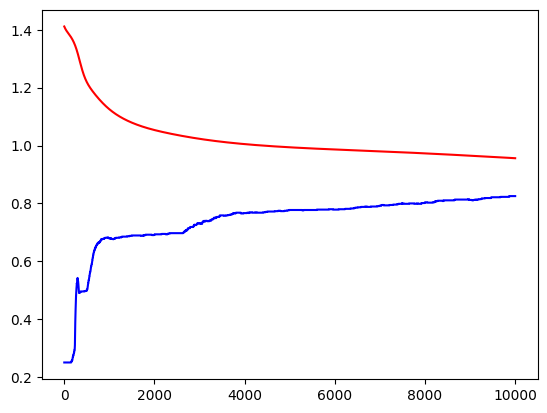

Loss before training 1.4111982583999634
Loss after training 0.9561846256256104


In [12]:
learning_rate = 0.2
epochs = 10000

loss_arr = []
acc_arr = []

for epoch in range(epochs):
    
    # forward pass
    YY_hat = model(XX_train)
    
    
    # change is here
    # torch function to compute cross entropy
    # given model output(prob dist.), true output(label)
    loss = F.cross_entropy(YY_hat, Y_train)
    
    # gradient on loss
    loss.backward()
    
    # logging loss, accuracy per epoch
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(YY_hat, Y_train))

    with torch.no_grad():
        Wmat1 -= Wmat1.grad * learning_rate
        Bvec1 -= Bvec1.grad * learning_rate
        Wmat2 -= Wmat2.grad * learning_rate
        Bvec2 -= Bvec2.grad * learning_rate

        # make gradients 0.
        Wmat1.grad.zero_()
        Bvec1.grad.zero_()
        Wmat2.grad.zero_()
        Bvec2.grad.zero_()

# plot the logged error, accuracy
# vs epoch
plt.plot(loss_arr, "r-")
plt.plot(acc_arr, "b-")
plt.show()
print("Loss before training", loss_arr[0])
print("Loss after training", loss_arr[-1])